## Context

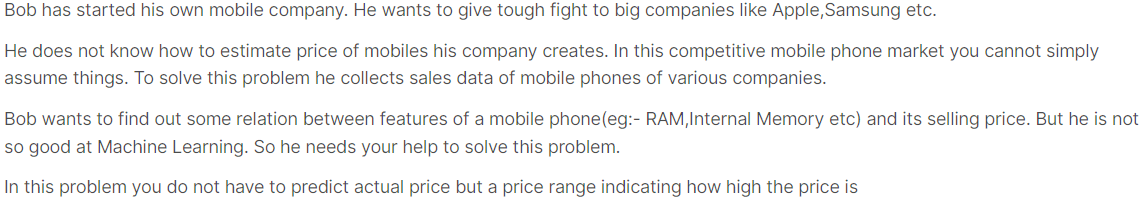

***
* **battery_power** :Total energy a battery can store in one time measured in mAh
* **clock_speed** :The speed at which microprocessor executes instructions
* **fc**: Front Camera megapixels
* **int_memory** :Internal Memory in Gigabytes
* **m_dep** :Mobile Depth in cm
* **mobile_wt** :Weight of the mobile phone
* **n_cores** :Number of cores of a processor
* **pc** :Primary Camera megapixels
* **px_height**: Pixel Resolution Height
* **px_width**: Pixel Resolution Width
* **ram** :Random Access Memory in MegaBytes
* **sc_h** :Screen Height of mobile in cm
* **sc_w** :Screen Width of mobile in cm
* **talk_time**: The longest time that a single battery charge will last when you are
* **price_range**: This is the target variable with the value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).
****

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv("/Users/anuraggupta/Documents/ML Data/2 Project-NaiveBayes/Mobile_Price/train.csv")

In [4]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
df.shape

(2000, 21)

* The Data has 2000 rows and 21 columns

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

* 😅 No Missinng values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

* All are numerical 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [9]:
df[(df["pc"]==0)&(df["fc"]==0)&(df["four_g"]==1)].shape

(59, 21)

* There are phone which do not have camera but 4g (it can be possible)

In [10]:
df[(df["three_g"]==1)&(df["four_g"]==0)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,607,748,1482,18,0,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,1829,1,2.1,0,8,0,59,0.1,91,5,...,1457,1919,3142,16,6,5,1,1,1,3
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3


There are 480 phones 3G

In [11]:
df[(df["three_g"]==0)&(df["four_g"]==0)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
19,682,1,0.5,0,4,0,19,1.0,121,4,...,902,1064,2337,11,1,18,0,1,1,1
22,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
30,1579,1,0.5,1,0,0,5,0.2,88,7,...,1358,1739,3532,17,11,12,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1454,0,2.6,0,8,0,6,0.4,199,3,...,698,1018,1300,10,0,2,0,0,1,1
1982,1784,0,1.6,0,4,0,41,0.4,164,6,...,610,1437,2313,14,1,11,0,1,0,2
1983,1262,0,1.8,1,12,0,34,0.1,149,5,...,223,737,3248,13,3,4,0,1,1,2
1988,1547,1,2.9,0,2,0,57,0.4,114,1,...,347,957,1620,9,2,19,0,1,1,1


There are phones which are neither 3G nor 4G

In [12]:
df[(df["pc"]==0)&(df["fc"]==0)&(df["three_g"]==1)].shape

(83, 21)

* There are also 3G phones that are 3G but do not have camera 

## Univariate Analysis

for categorical

In [13]:
def univariate_cat(data,x): 
    missing=data[x].isnull().sum() 
    unique_cnt=data[x].nunique() 
    unique_cat=list(data[x].unique()) 
    f1=pd.DataFrame(data[x].value_counts()) 
    f1.rename(columns={x:'count'},inplace=True) 
    f2=pd.DataFrame(data[x].value_counts(normalize=True)) 
    f2.rename(columns={x:'percentage'},inplace=True) 
    f2['percentage']=(f2['percentage']*100).round(2).astype(str)+'%' 
    ff=pd.concat([f1,f2],axis=1) 
    print(f"Total missing values : {missing}\n") 
    print(f"Total count of unique categories: {unique_cnt}\n") 
    print(f"Unique categories :\n{unique_cat}") 
    print(f'Value count and %\n:',ff)
    sns.countplot(data=data,x=x)
    plt.show()

Total missing values : 0

Total count of unique categories: 4

Unique categories :
[1, 2, 3, 0]
Value count and %
:    count percentage
1    500      25.0%
2    500      25.0%
3    500      25.0%
0    500      25.0%


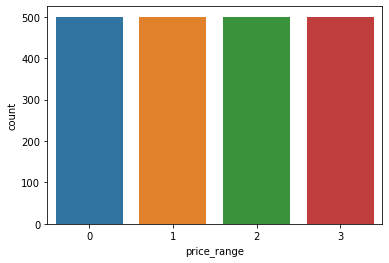

In [14]:
univariate_cat(data=df,x="price_range")

* As we can seee the data set is not imbalanced

Total missing values : 0

Total count of unique categories: 2

Unique categories :
[0, 1]
Value count and %
:    count percentage
1   1019     50.95%
0    981     49.05%


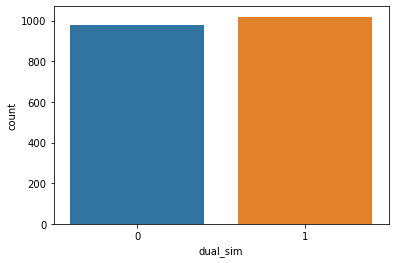

In [15]:
univariate_cat(data=df,x="dual_sim")

for numerical

In [16]:
def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(),2)
    max1=round(data[x].max(),2)
    mean=round(data[x].mean(),2)
    var=round(data[x].var(),2)
    std=round(data[x].std(),2)
    range1=round(max1-min1,2)
    q1=round(data[x].quantile(.25),2)
    q2=round(data[x].quantile(.50),2)
    q3=round(data[x].quantile(.75),2)
    skew=round(data[x].skew(),2)
    kurt=round(data[x].kurt(),2)
    myvalue={"missing" : missing,"min" : min1,"max" : max1,"mean" : mean,"var" : var, "std" : std,"range" : range1,
             "q1" : q1,"q2" : q2,"q3" : q3,"skewness" : skew,"Kurtosis" : kurt}
    sns.histplot(data[x],kde=True)
    plt.show()
    sns.boxplot(data=data,y=data[x])
    plt.show()
    return myvalue

In [17]:
['battery_power', 'blue', '', '', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']

['battery_power',
 'blue',
 '',
 '',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

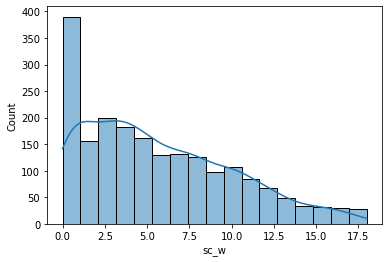

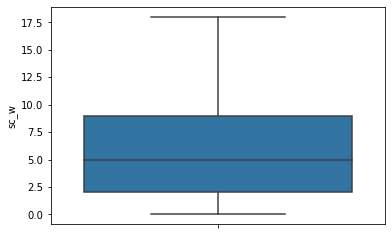

{'missing': 0,
 'min': 0,
 'max': 18,
 'mean': 5.77,
 'var': 18.98,
 'std': 4.36,
 'range': 18,
 'q1': 2.0,
 'q2': 5.0,
 'q3': 9.0,
 'skewness': 0.63,
 'Kurtosis': -0.39}

In [18]:
univariate_num(data=df,x="sc_w")

* Screen width Can't be 0 

In [19]:
df["sc_w"]=df["sc_w"].replace([0],np.nan)

In [20]:
df["sc_w"].isnull().sum()

180

* 😩 We have succesfully created a problem now solve it

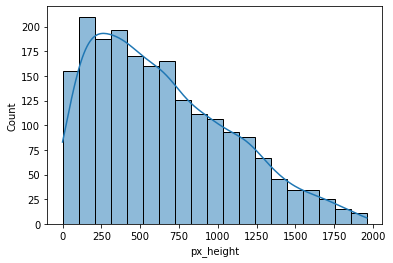

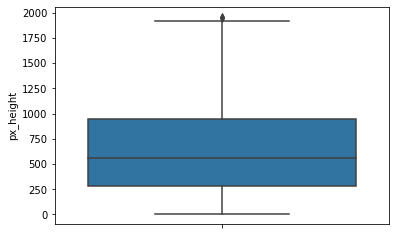

{'missing': 0,
 'min': 0,
 'max': 1960,
 'mean': 645.11,
 'var': 196941.41,
 'std': 443.78,
 'range': 1960,
 'q1': 282.75,
 'q2': 564.0,
 'q3': 947.25,
 'skewness': 0.67,
 'Kurtosis': -0.32}

In [21]:
univariate_num(data=df,x="px_height")

* pixel height can' be zero 
* have to treat it toooo

In [22]:
df[df["px_height"]==0].shape

(2, 21)

There are only 2 cases 
we can drop them but lets treat them 

In [23]:
df["px_height"]=df["px_height"].replace([0],np.nan)

we have to treat missing value for this column too

In [24]:
df["px_height"].value_counts(ascending=True)

1298.0    1
1949.0    1
1638.0    1
1480.0    1
1220.0    1
         ..
447.0     5
371.0     6
179.0     6
275.0     6
347.0     7
Name: px_height, Length: 1136, dtype: int64

### Bivariate

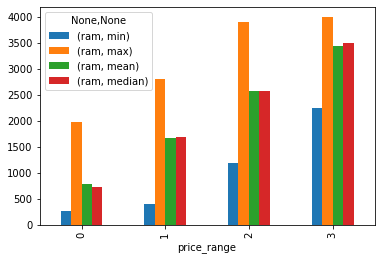

In [25]:
df.groupby(["price_range"]).agg({"ram":["min","max","mean","median"]}).plot(kind="bar")
plt.show()

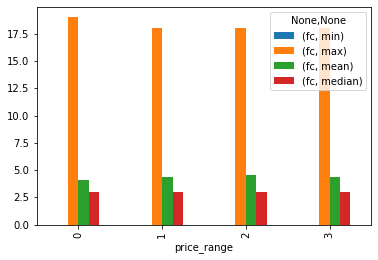

In [26]:
df.groupby(["price_range"]).agg({"fc":["min","max","mean","median"]}).plot(kind="bar")
plt.show()

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.495000,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.309500,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.521500,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0


In [28]:
df[(df["three_g"]==0)&(df["four_g"]==0)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20.0,756,2549,9,7.0,19,0,0,1,1
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248.0,874,3946,5,2.0,7,0,0,0,3
19,682,1,0.5,0,4,0,19,1.0,121,4,...,902.0,1064,2337,11,1.0,18,0,1,1,1
22,1949,0,2.6,1,4,0,47,0.3,199,4,...,407.0,822,1433,11,5.0,20,0,0,1,1
30,1579,1,0.5,1,0,0,5,0.2,88,7,...,1358.0,1739,3532,17,11.0,12,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1454,0,2.6,0,8,0,6,0.4,199,3,...,698.0,1018,1300,10,NaN,2,0,0,1,1
1982,1784,0,1.6,0,4,0,41,0.4,164,6,...,610.0,1437,2313,14,1.0,11,0,1,0,2
1983,1262,0,1.8,1,12,0,34,0.1,149,5,...,223.0,737,3248,13,3.0,4,0,1,1,2
1988,1547,1,2.9,0,2,0,57,0.4,114,1,...,347.0,957,1620,9,2.0,19,0,1,1,1


In [29]:
def is_threeG(obj):
    if obj== 1:
        return "3G"
    else:
        return 0

In [30]:
df["three_g"]=df["three_g"].apply(is_threeG)

In [31]:
df["three_g"]

0        0
1       3G
2       3G
3       3G
4       3G
        ..
1995    3G
1996    3G
1997    3G
1998    3G
1999    3G
Name: three_g, Length: 2000, dtype: object

In [32]:
df["three_g"].value_counts()

3G    1523
0      477
Name: three_g, dtype: int64

In [33]:
df["four_g"].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

In [34]:
def is_fourG(obj):
    if obj==1:
        return "4G"
    else:
        return 0

In [35]:
df["four_g"]=df["four_g"].apply(is_fourG)

In [36]:
df["four_g"].value_counts()

4G    1043
0      957
Name: four_g, dtype: int64

* Now when we make dummies of these columns the third variable which is probably below 3g will identifiable

## missing value treatment

In [37]:
df.isnull().sum()

battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                 0
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          2
px_width           0
ram                0
sc_h               0
sc_w             180
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [38]:
180/2000*100

9.0

In [39]:
df.shape

(2000, 21)

In [40]:
df["sc_w"].fillna(df["sc_w"].median(),inplace=True)

In [41]:
df["sc_w"].isnull().sum()

0

In [42]:
df["px_height"].fillna(df["px_height"].median(),inplace=True)

In [43]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [44]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   object 
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

In [45]:
df[(df["three_g"]==0)&(df["four_g"]==0)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20.0,756,2549,9,7.0,19,0,0,1,1
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248.0,874,3946,5,2.0,7,0,0,0,3
19,682,1,0.5,0,4,0,19,1.0,121,4,...,902.0,1064,2337,11,1.0,18,0,1,1,1
22,1949,0,2.6,1,4,0,47,0.3,199,4,...,407.0,822,1433,11,5.0,20,0,0,1,1
30,1579,1,0.5,1,0,0,5,0.2,88,7,...,1358.0,1739,3532,17,11.0,12,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1454,0,2.6,0,8,0,6,0.4,199,3,...,698.0,1018,1300,10,6.0,2,0,0,1,1
1982,1784,0,1.6,0,4,0,41,0.4,164,6,...,610.0,1437,2313,14,1.0,11,0,1,0,2
1983,1262,0,1.8,1,12,0,34,0.1,149,5,...,223.0,737,3248,13,3.0,4,0,1,1,2
1988,1547,1,2.9,0,2,0,57,0.4,114,1,...,347.0,957,1620,9,2.0,19,0,1,1,1


## Outliers Treatment`

In [46]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.25,.75,.9,.95,.96,.97,.98,.99]).T


,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
battery_power,2000.0,1238.51850,439.418206,501.0,510.00,524.96,538.97,556.92,570.95,851.75,1226.0,1615.25,1851.0,1930.15,1946.08,1961.06,1974.00,1987.00,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.50,0.50,0.50,0.50,0.50,0.70,1.5,2.20,2.7,2.80,2.90,2.90,2.90,3.00,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,0.00,0.00,0.00,0.00,0.00,1.00,3.0,7.00,11.0,13.00,14.00,15.00,16.00,16.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,2.00,2.00,3.00,4.00,5.00,16.00,32.0,48.00,57.0,61.00,62.00,63.00,63.00,64.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.10,0.10,0.10,0.10,0.10,0.20,0.5,0.80,0.9,1.00,1.00,1.00,1.00,1.00,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,80.00,82.00,83.00,84.00,86.00,109.00,141.0,170.00,189.0,196.00,197.00,198.00,199.00,199.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,1.00,1.00,1.00,1.00,1.00,3.00,4.0,7.00,8.0,8.00,8.00,8.00,8.00,8.00,8.0
pc,2000.0,9.91650,6.064315,0.0,0.00,0.00,0.00,0.00,0.00,5.00,10.0,15.00,18.0,20.00,20.00,20.00,20.00,20.00,20.0


* No outliers 

### Multicollinearty check

In [47]:
cr=df.corr()

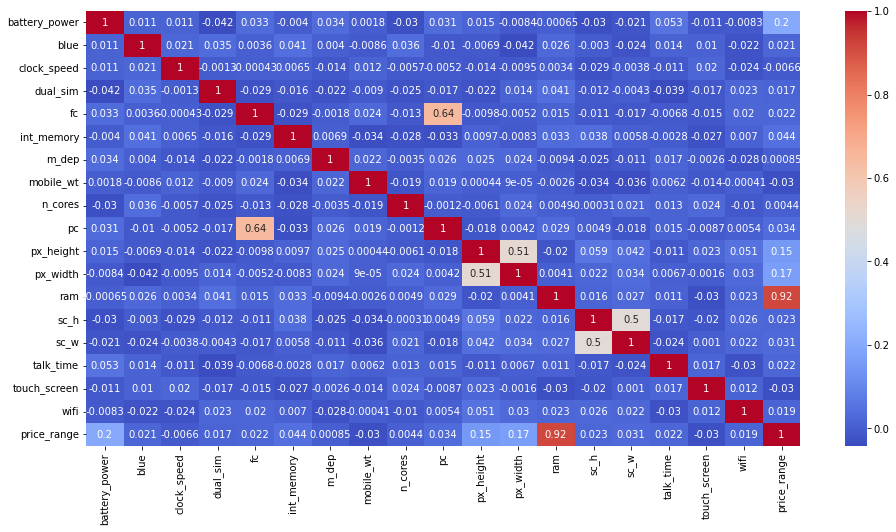

In [48]:
plt.figure(figsize=(16,8))
sns.heatmap(cr,annot=True,cmap="coolwarm")
plt.show()

#### Dummy Creation

In [49]:
df1=pd.get_dummies(data=df,drop_first=True)

## Decision Tree

In [50]:
y=df1["price_range"]
x=df1.drop(["price_range"],axis=1)

In [51]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [52]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [53]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

1.0

In [55]:
dt.score(x_test,y_test)

0.81

In [56]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20.0,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,0,4G,53,0.7,136,3,...,905.0,1988,2631,17,3.0,7,3G,1,0,2
2,563,1,0.5,1,2,4G,41,0.9,145,5,...,1263.0,1716,2603,11,2.0,9,3G,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216.0,1786,2769,16,8.0,11,3G,0,0,2
4,1821,1,1.2,0,13,4G,44,0.6,141,2,...,1208.0,1212,1411,8,2.0,15,3G,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,4G,2,0.8,106,6,...,1222.0,1890,668,13,4.0,19,3G,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915.0,1965,2032,11,10.0,16,3G,1,1,2
1997,1911,0,0.9,1,1,4G,36,0.7,108,8,...,868.0,1632,3057,9,1.0,5,3G,1,0,3
1998,1512,0,0.9,0,4,4G,46,0.1,145,5,...,336.0,670,869,18,10.0,19,3G,1,1,0


In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import naive_bayes
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [59]:
mn=MinMaxScaler()

mn_fit=mn.fit(x_train)

x_train_mn=mn_fit.transform(x_train)
x_test_mn=mn_fit.transform(x_test)

x_train_mn=pd.DataFrame(x_train_mn,columns=x_train.columns)
x_test_mn=pd.DataFrame(x_test_mn,columns=x_test.columns)

In [2]:
mn=MultinomialNB()

In [3]:
?mn

In [65]:
mn.fit(x_train,y_train)

MultinomialNB()

In [66]:
print("Train Accuracy",mn.score(x_train_mn,y_train))
print("Test Accuracy",mn.score(x_test_mn,y_test))

Train Accuracy 0.25066666666666665
Test Accuracy 0.248
